In [1]:
import pandas as pd
import glob
import os
from sklearn.metrics import average_precision_score, auc
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy.stats import mannwhitneyu

In [2]:
%env DART_WORK_DIR=/oak/stanford/groups/akundaje/arpitas/dart-eval/

env: DART_WORK_DIR=/oak/stanford/groups/akundaje/arpitas/dart-eval/


In [3]:
work_dir = os.environ.get("DART_WORK_DIR", "")
work_dir
from variant_tasks import *

/oak/stanford/groups/akundaje/arpitas/dart-eval/task_5_variant_effect_prediction/outputs/probed/DNABERT-2-117M/Afr.CaQTLS.counts.tsv
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 0.2535744390850585
DNABert2 African Significant caQTLs


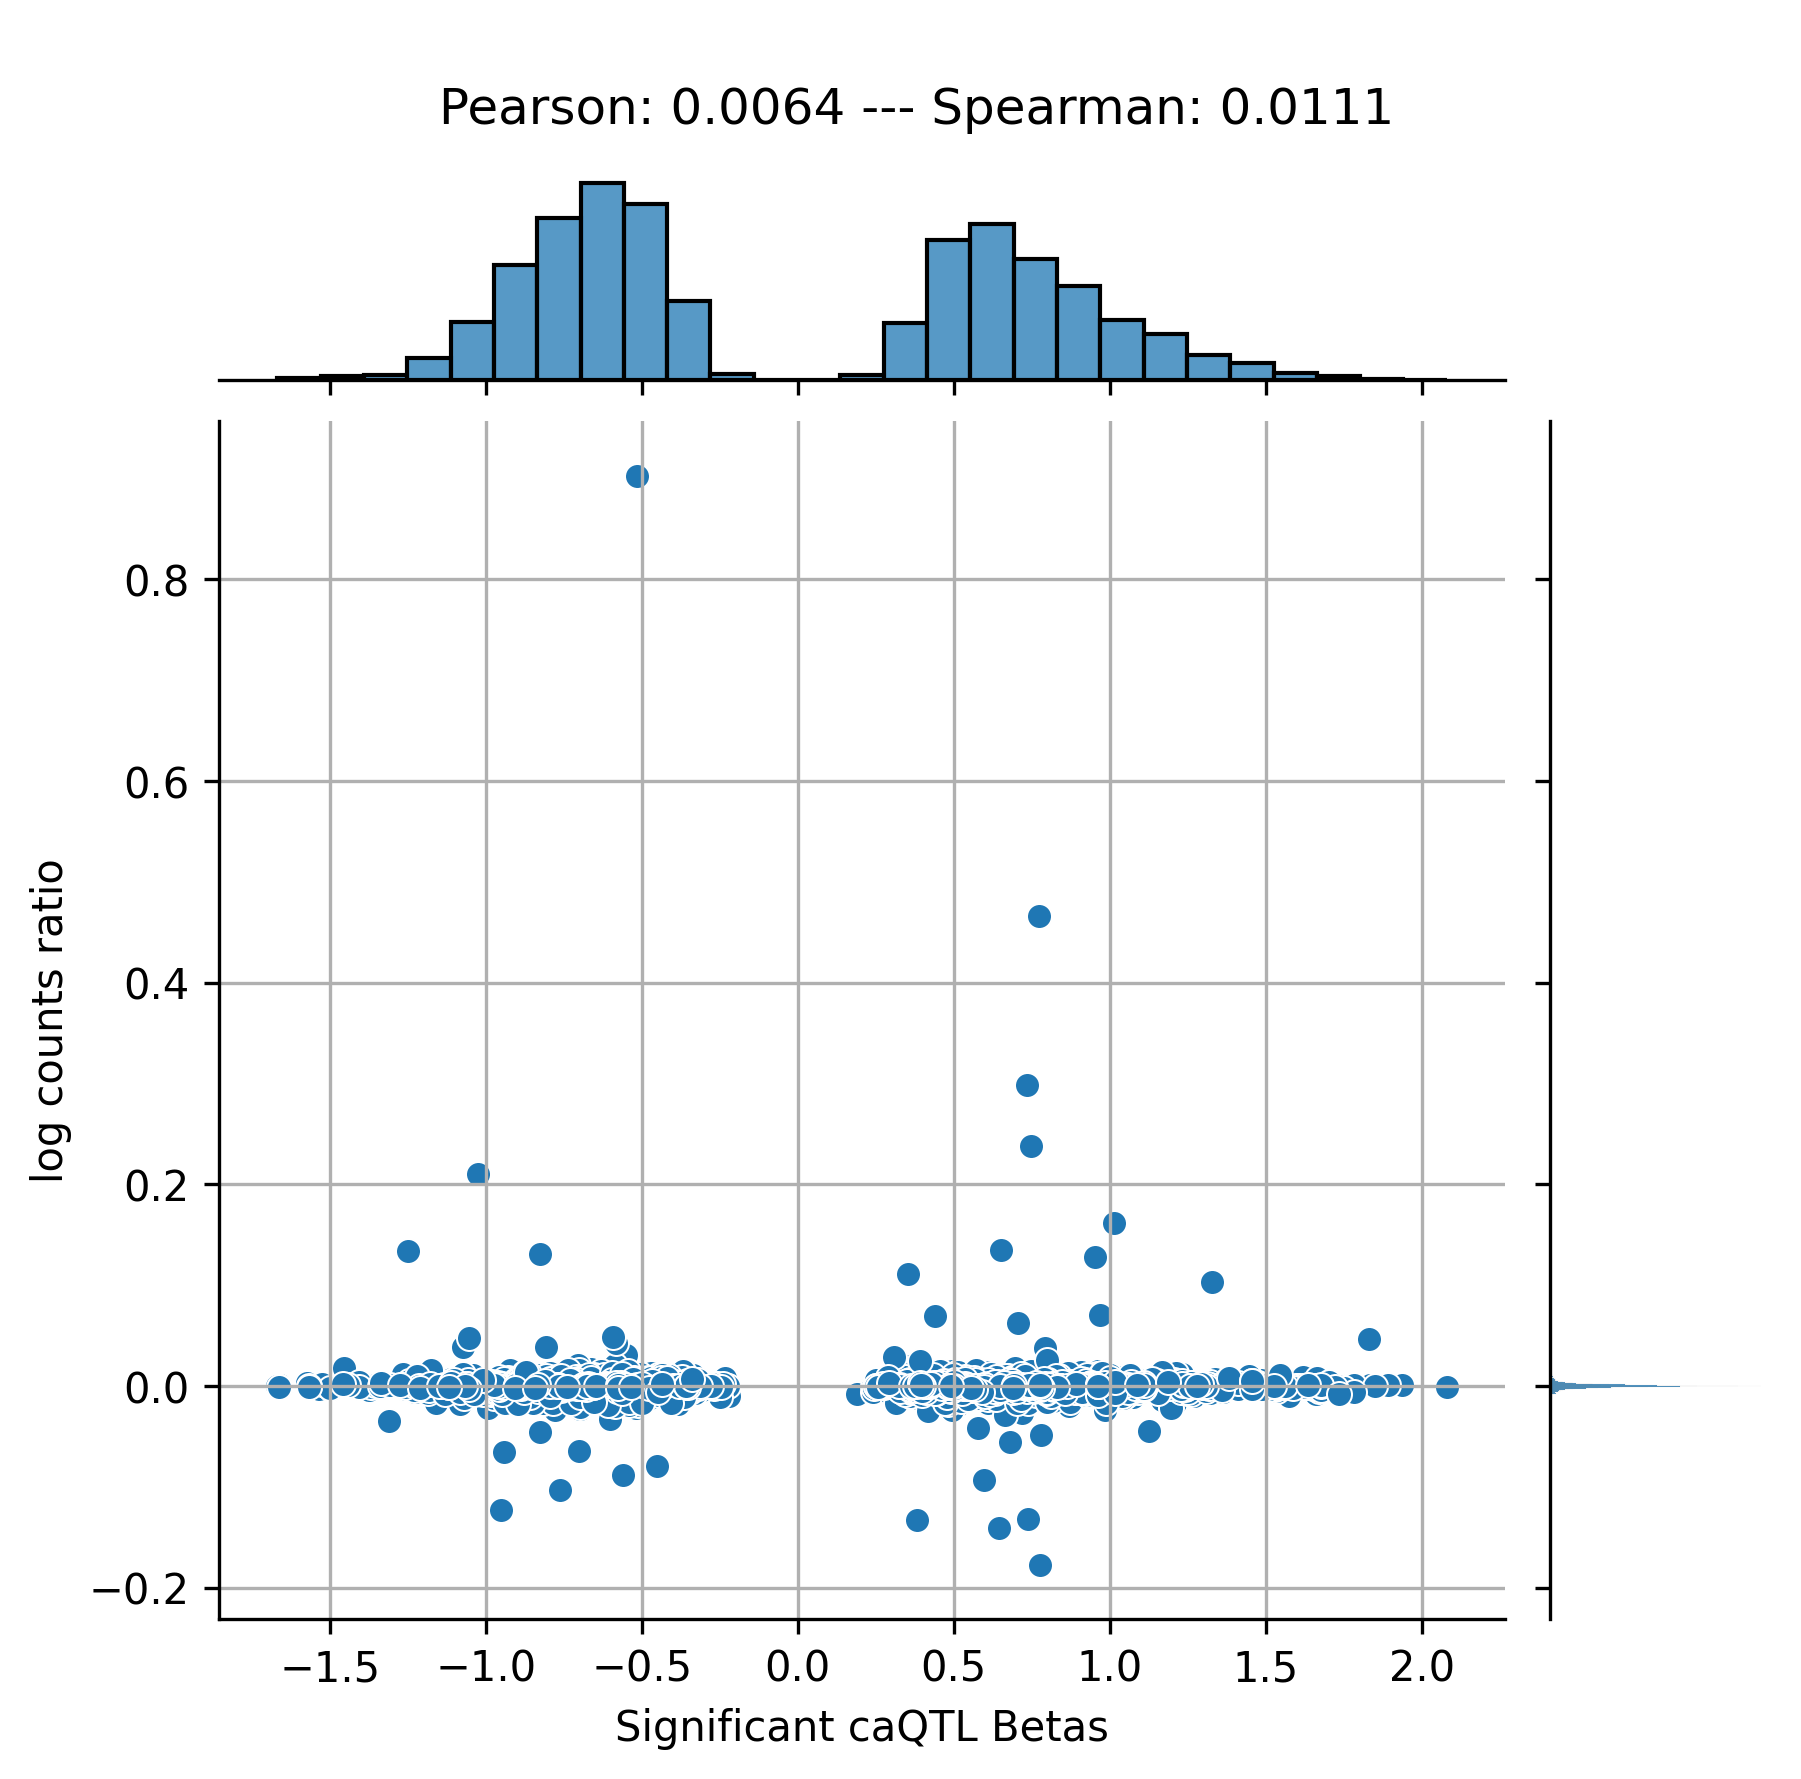

/oak/stanford/groups/akundaje/arpitas/dart-eval/task_5_variant_effect_prediction/outputs/probed/gena-lm-bert-large-t2t/Afr.CaQTLS.counts.tsv
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 2.2893817009712938e-05
Gena LM African Significant caQTLs


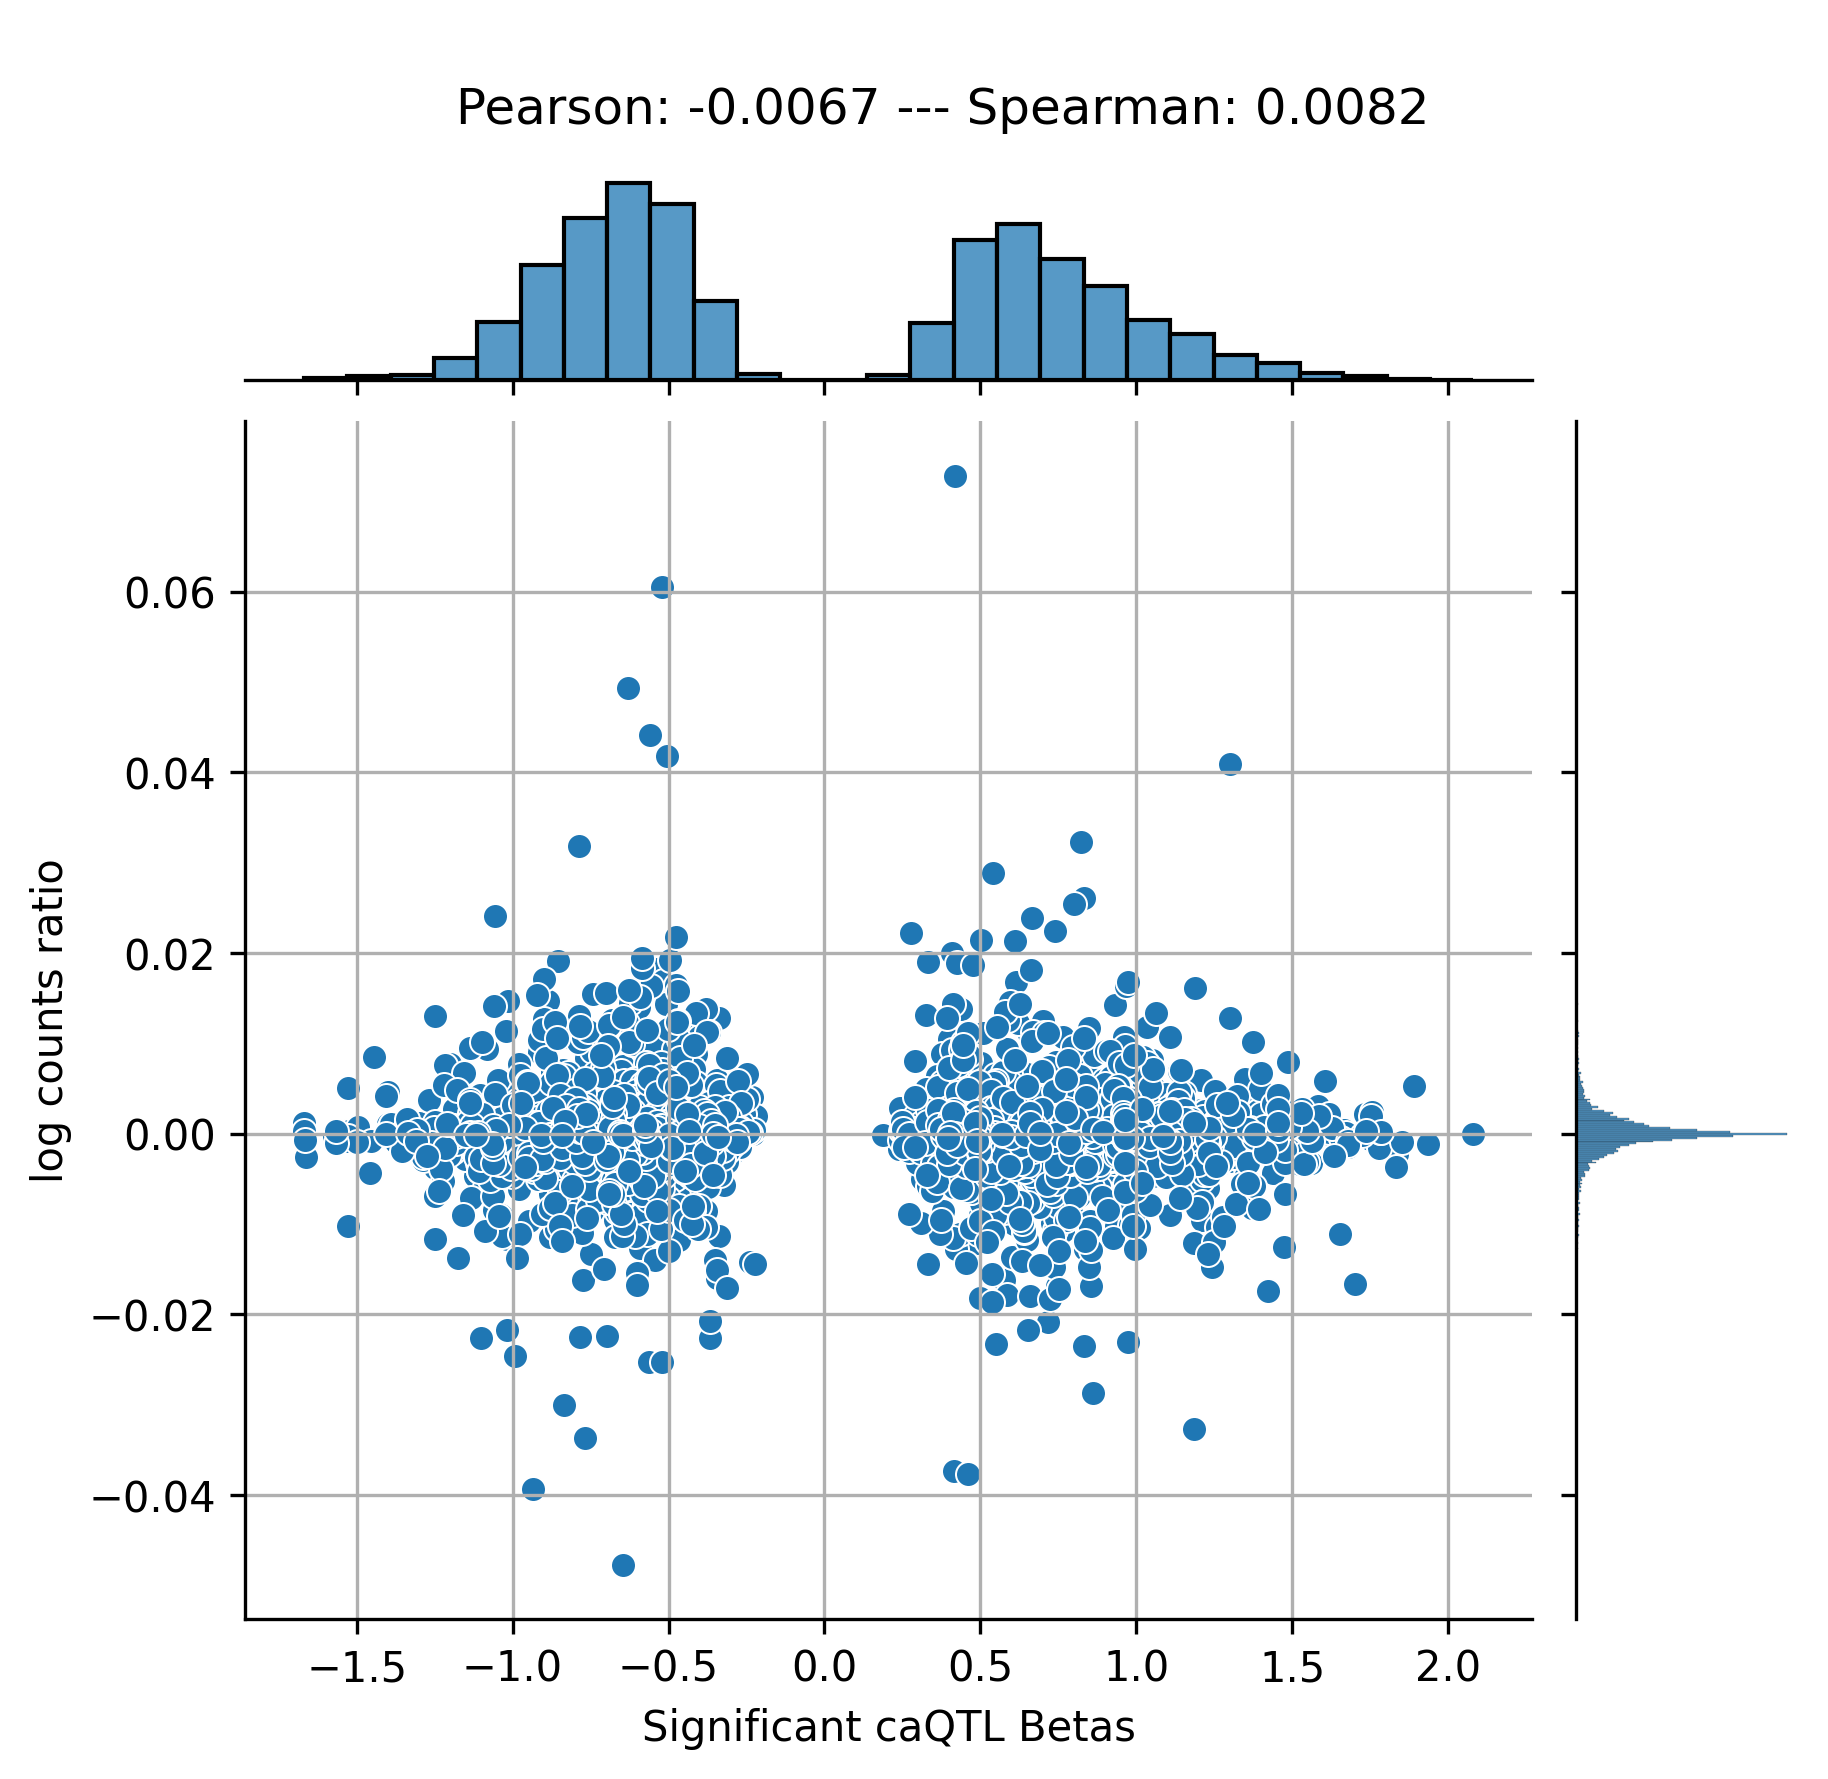

/oak/stanford/groups/akundaje/arpitas/dart-eval/task_5_variant_effect_prediction/outputs/probed/hyenadna-large-1m-seqlen-hf/Afr.CaQTLS.counts.tsv
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 4.032594684213053e-73
HyenaDNA African Significant caQTLs


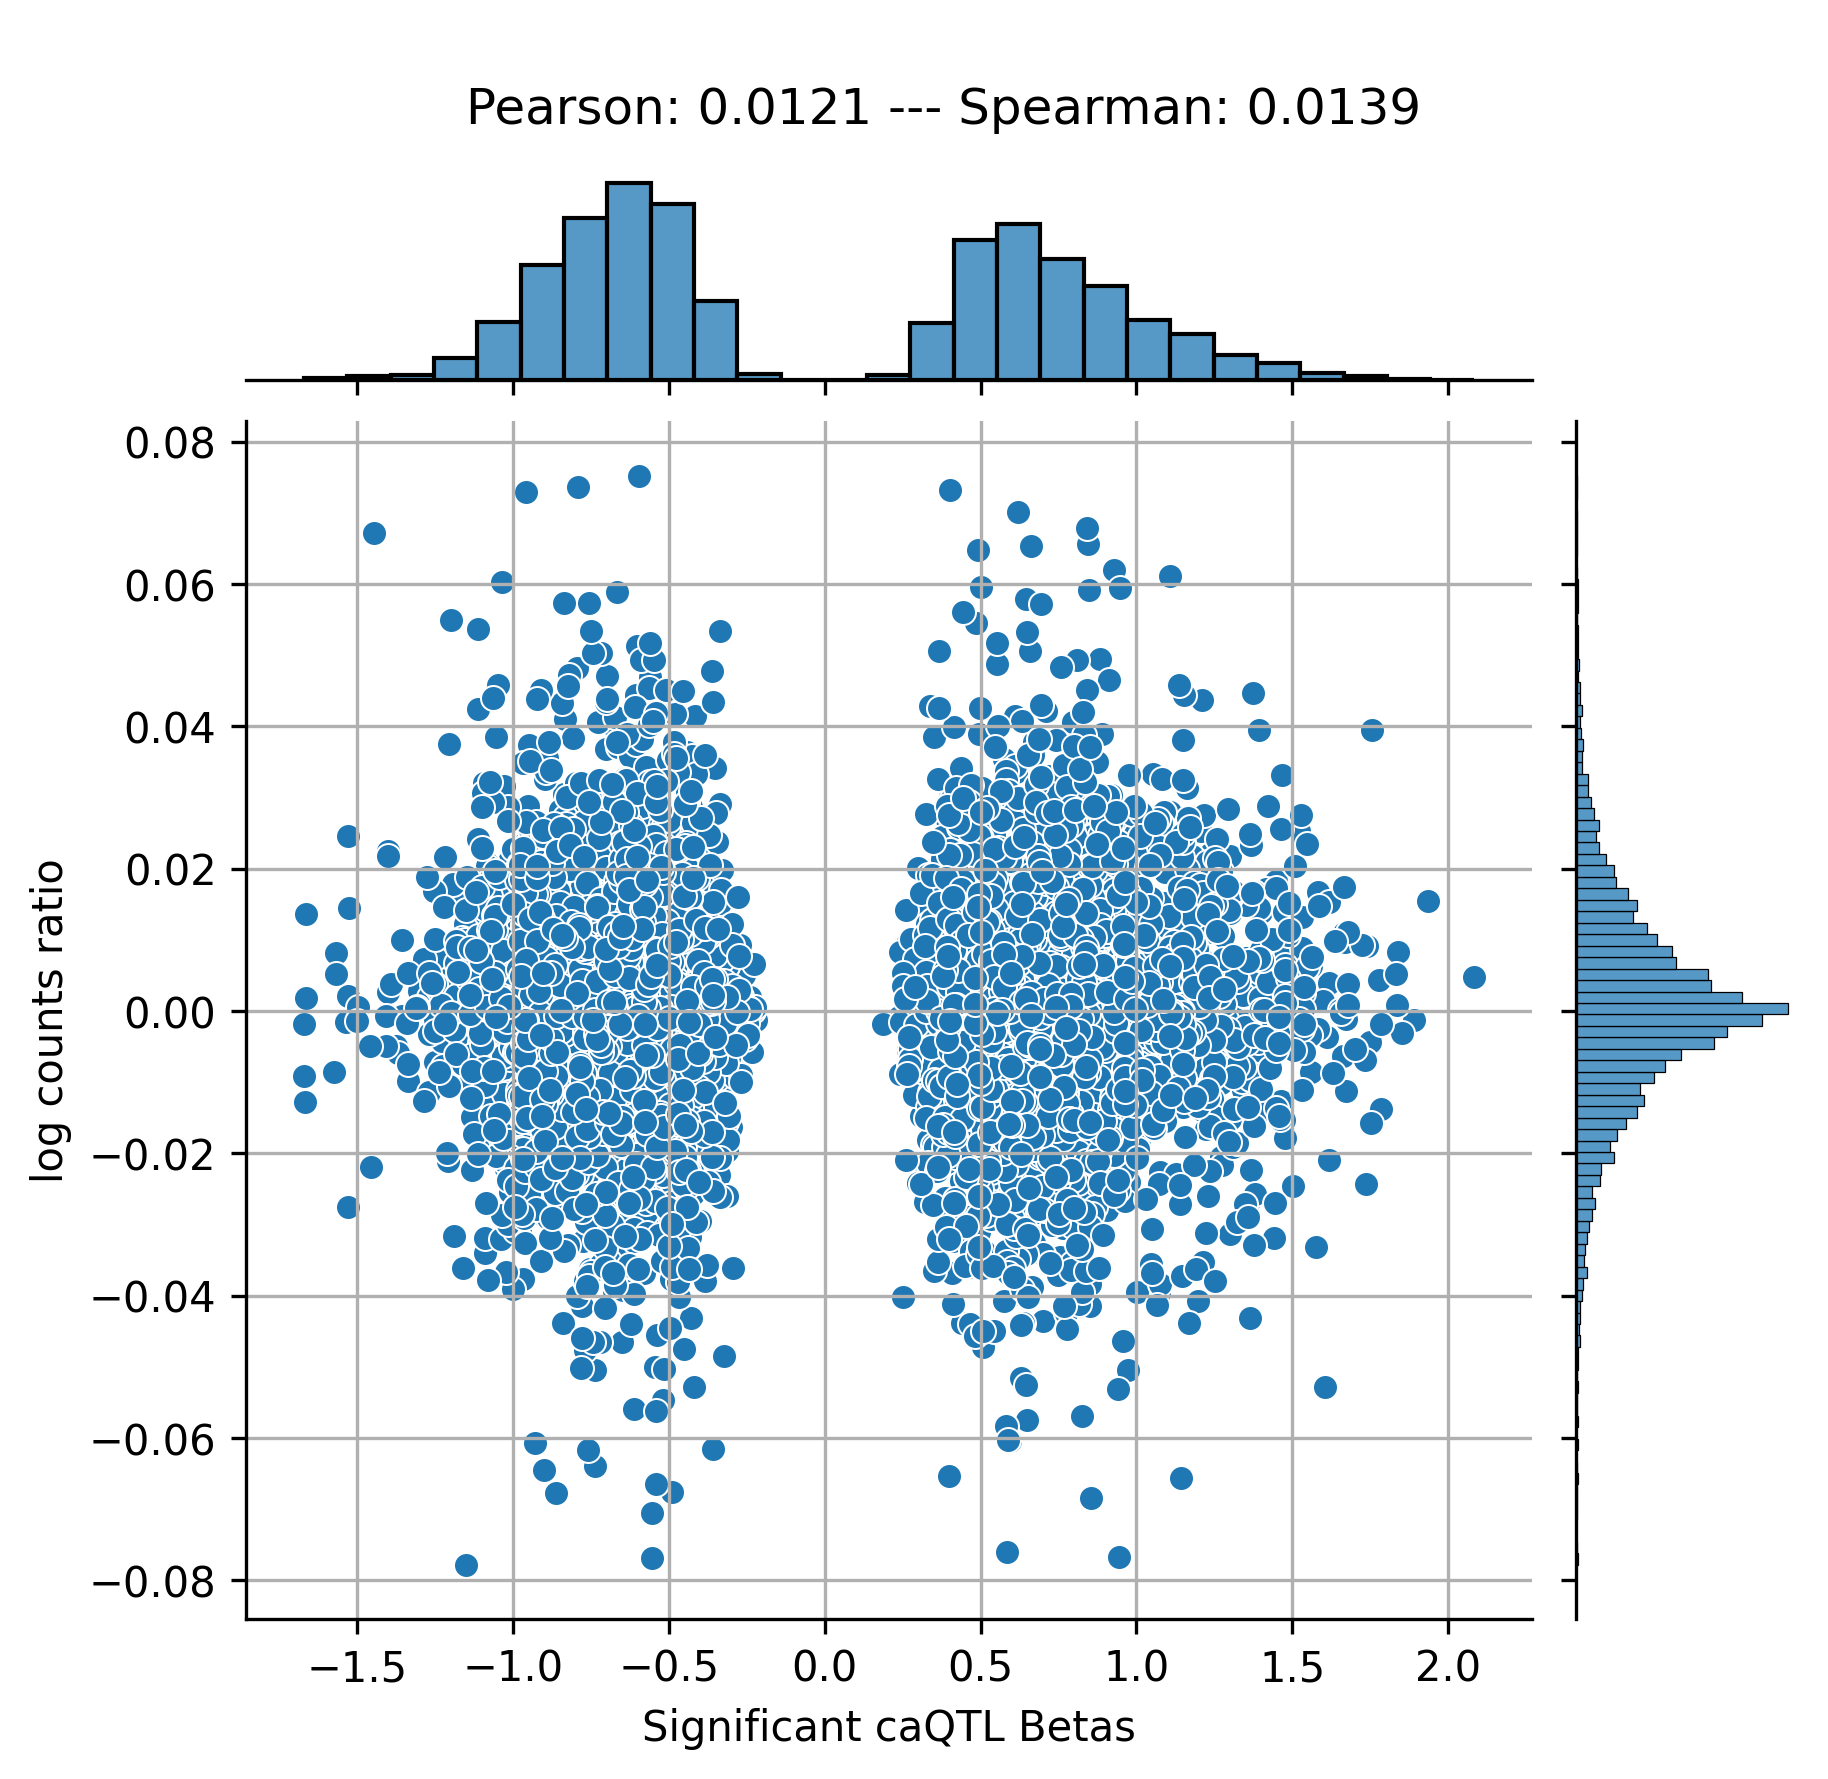

/oak/stanford/groups/akundaje/arpitas/dart-eval/task_5_variant_effect_prediction/outputs/probed/nucleotide-transformer-v2-500m-multi-species/Afr.CaQTLS.counts.tsv
unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 5.401758824480406e-12
Nucleotide Transformer African Significant caQTLs


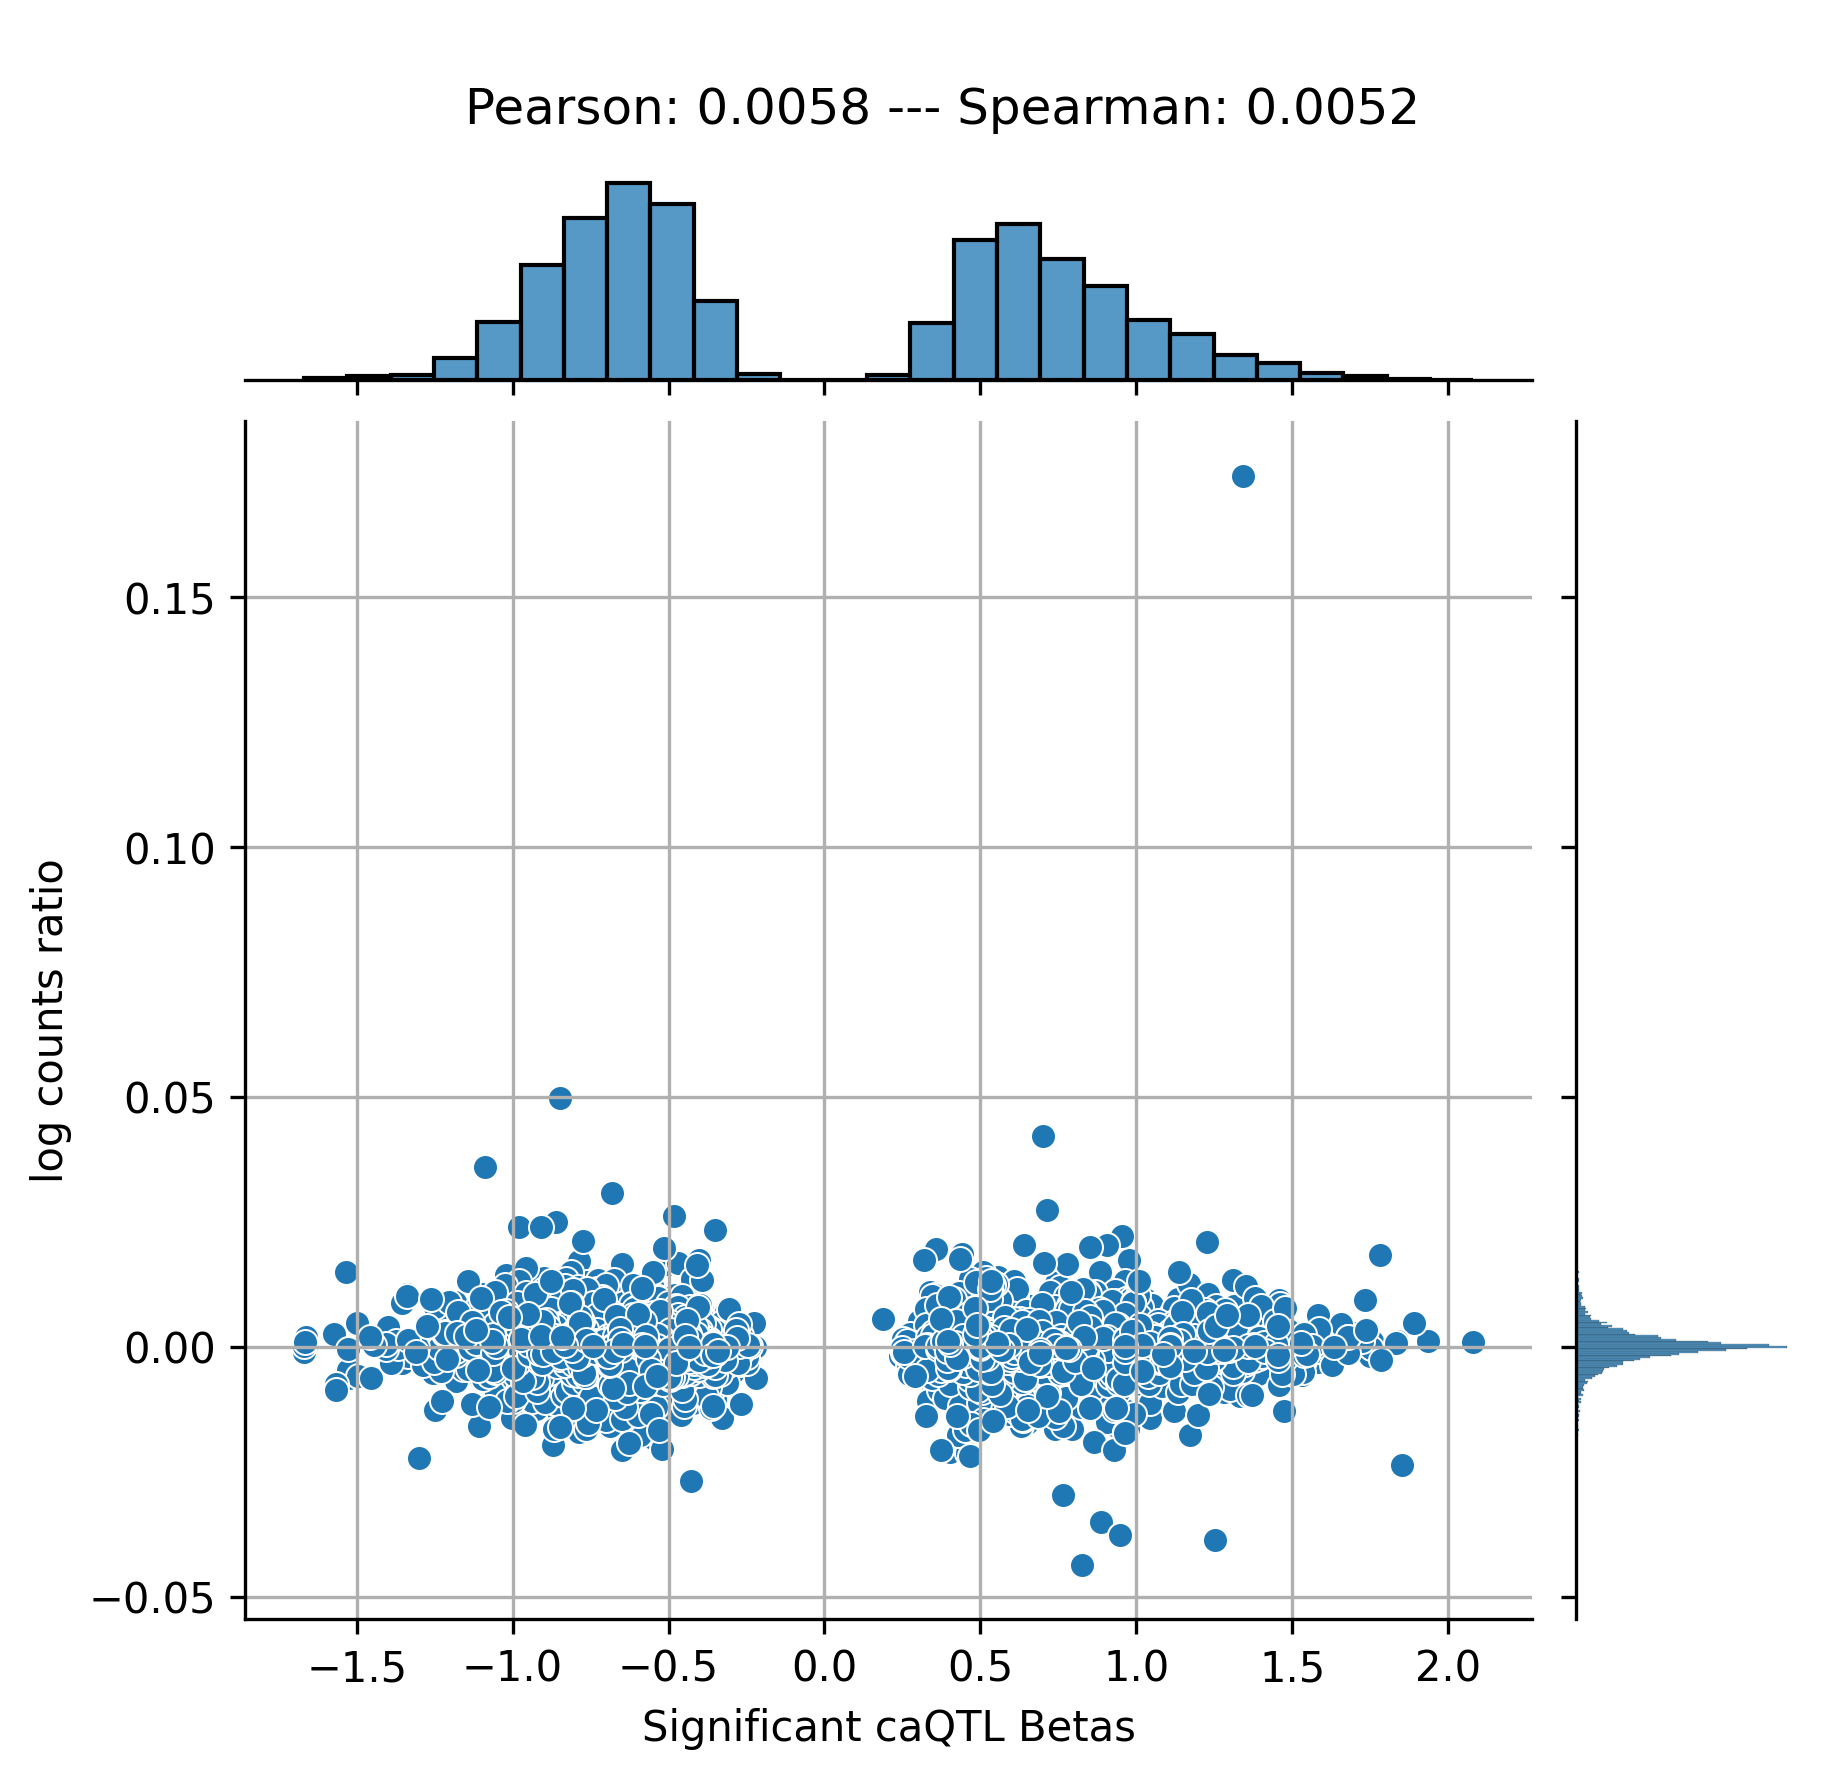

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
DNABert2 Yoruba Significant dsQTLs


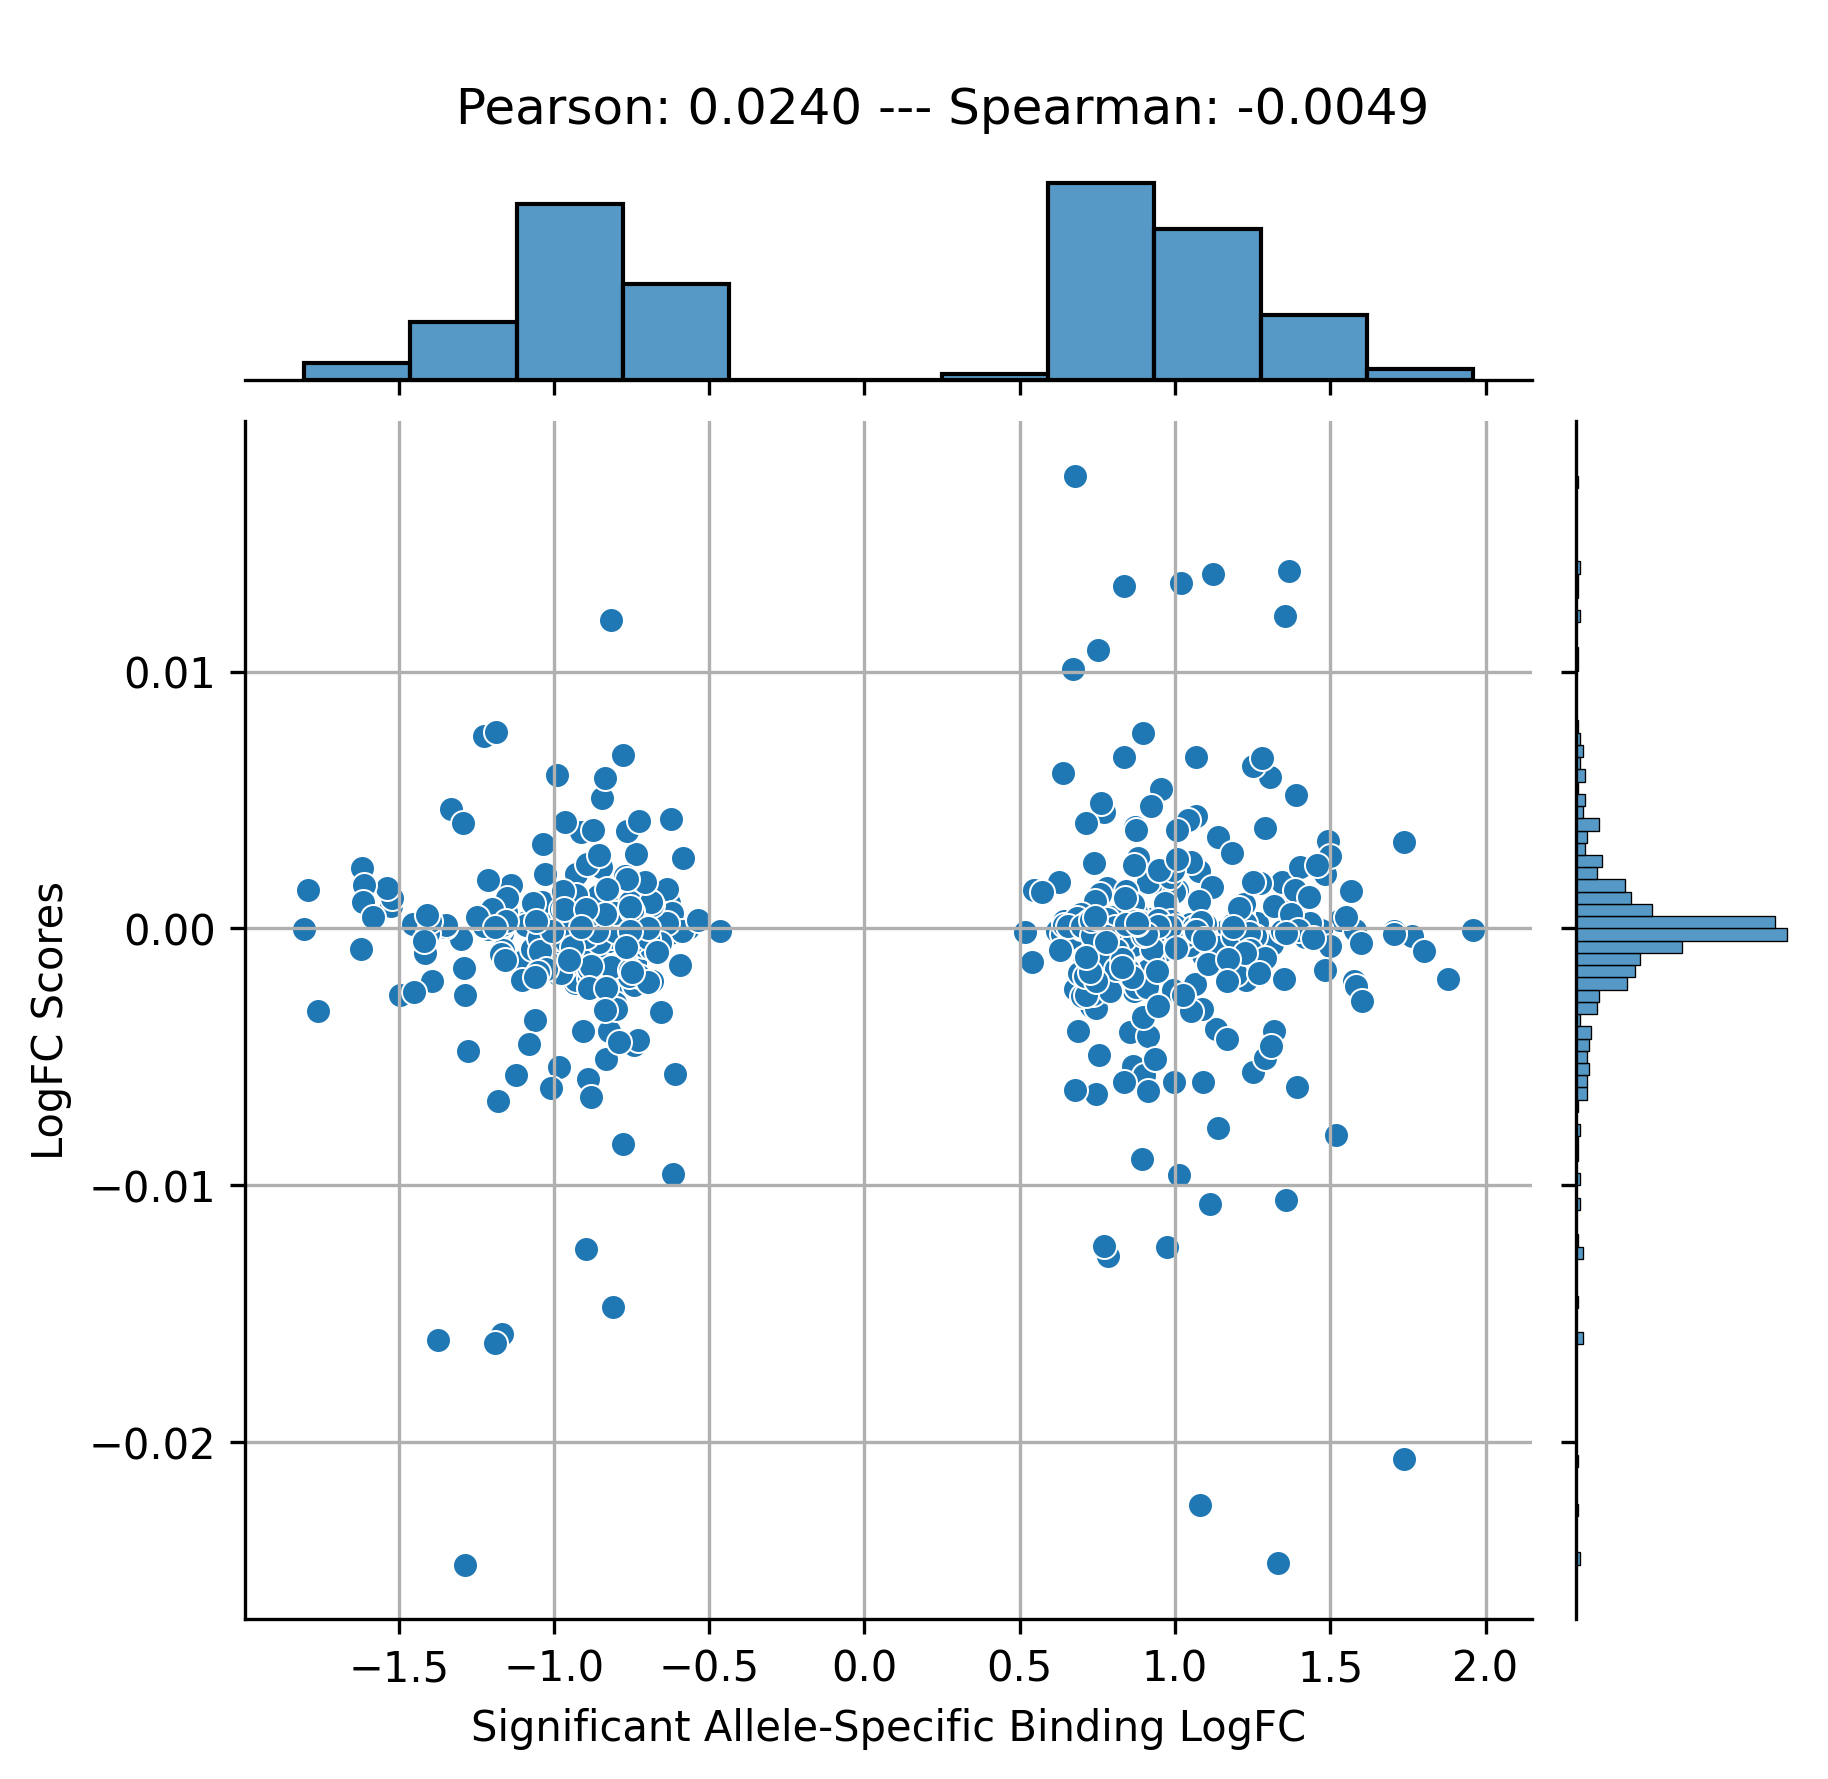

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
Gena LM Yoruba Significant dsQTLs


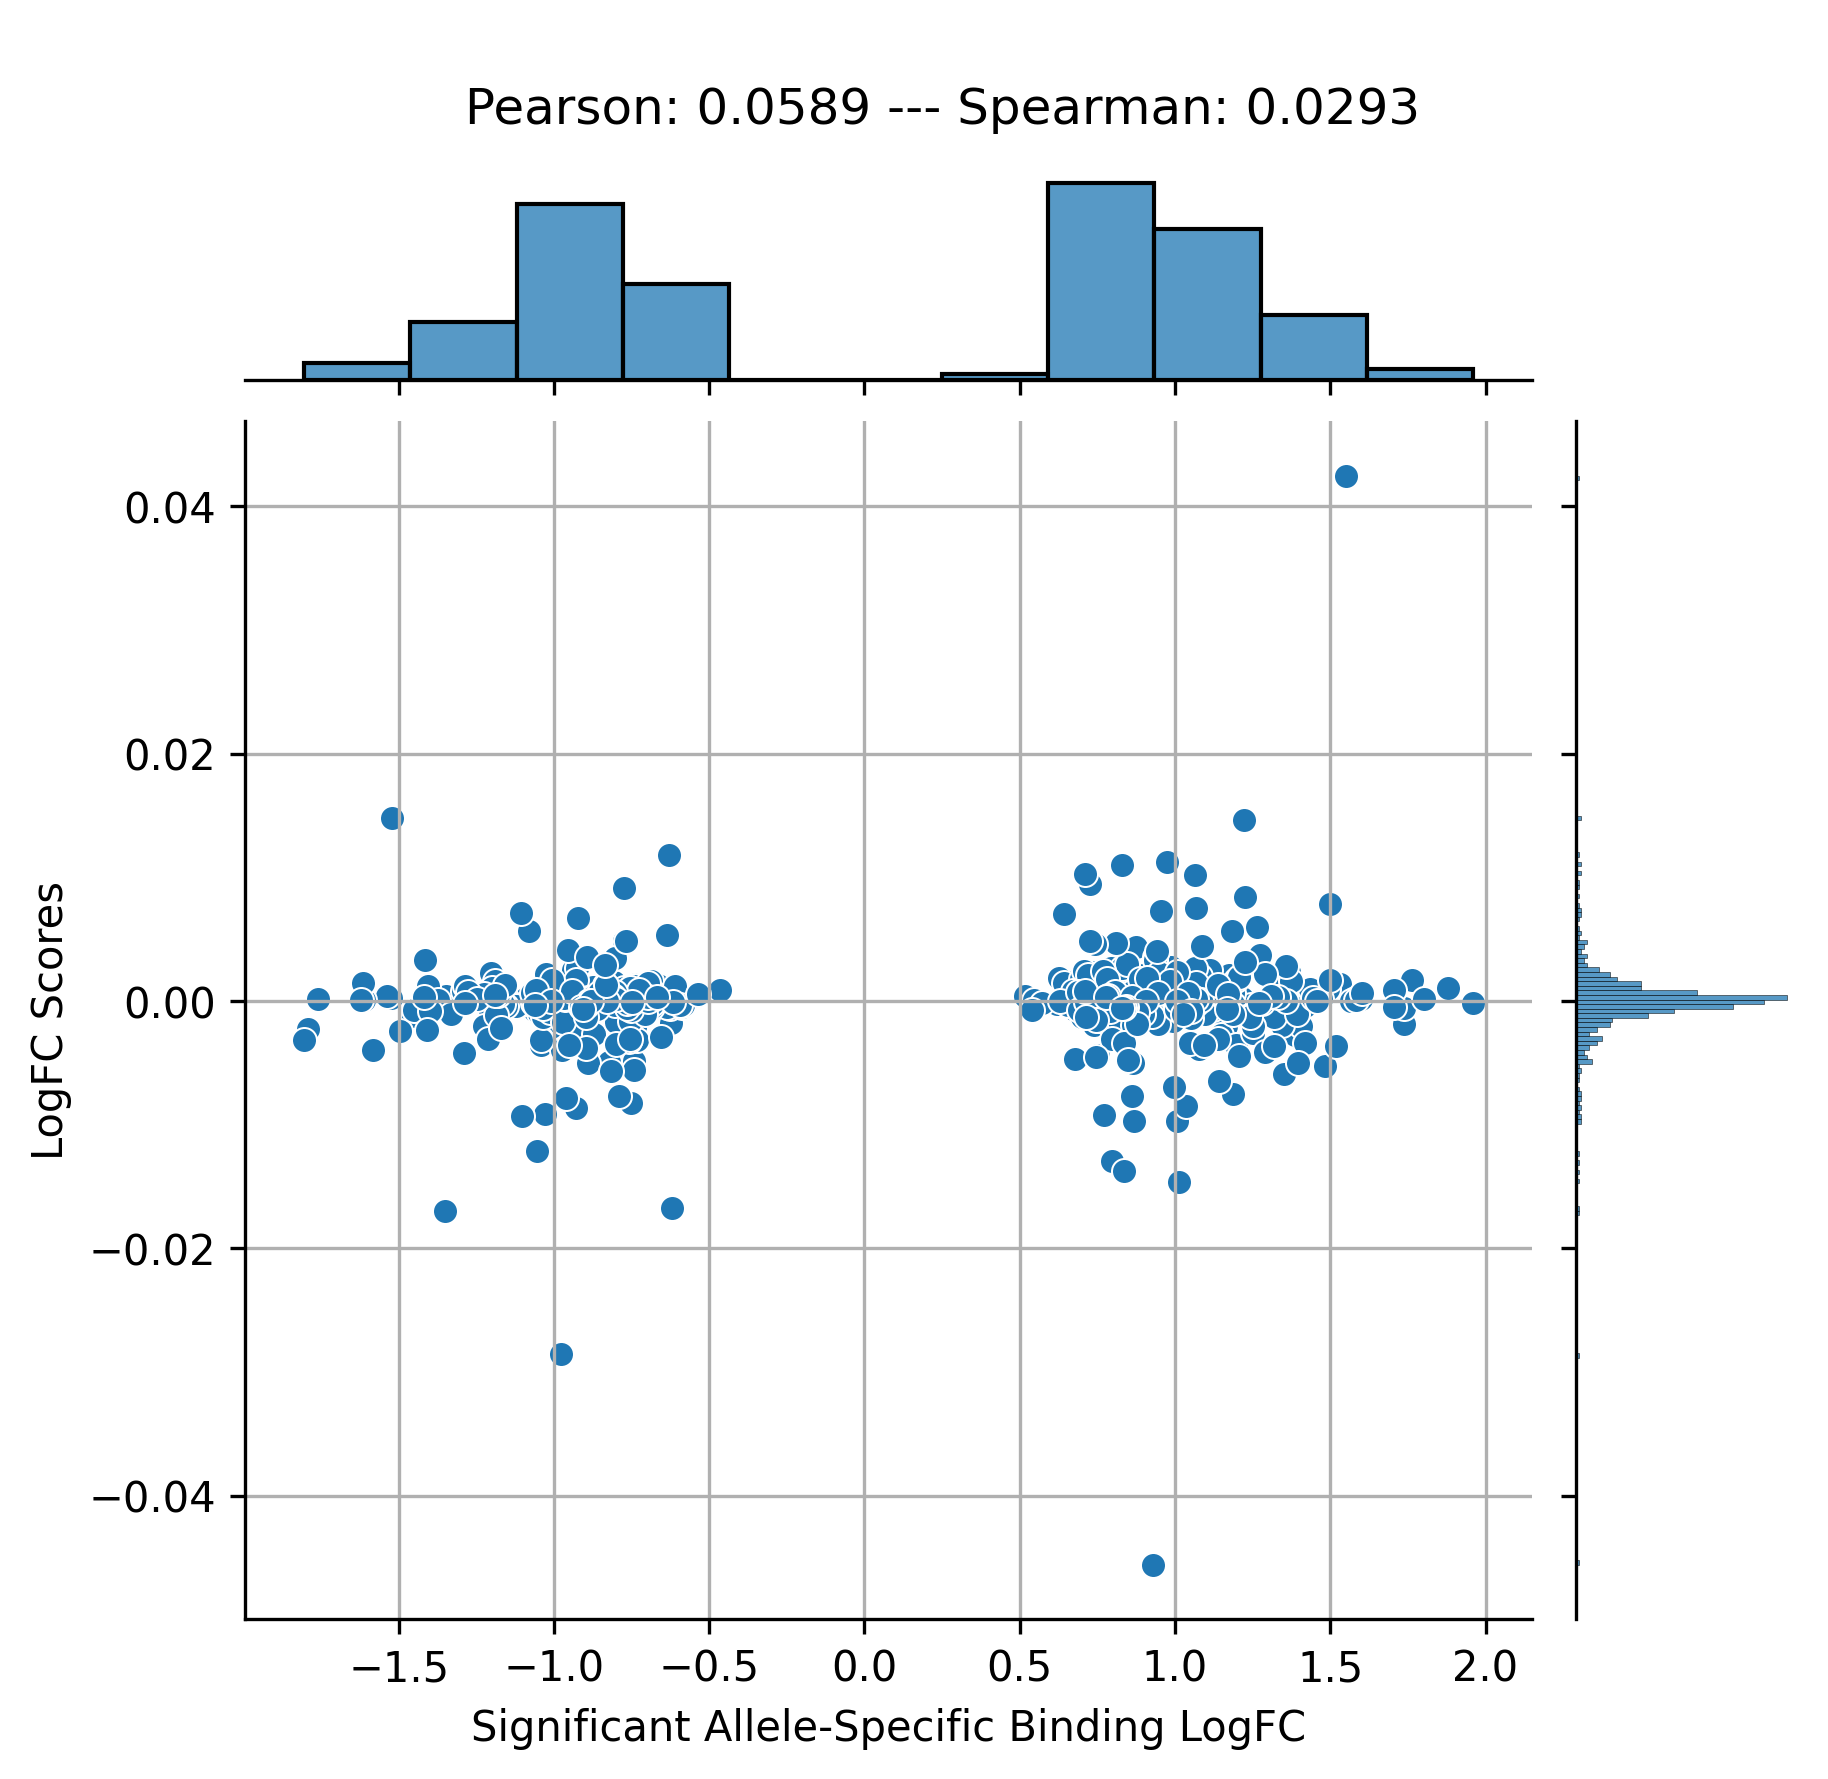

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
HyenaDNA Yoruba Significant dsQTLs


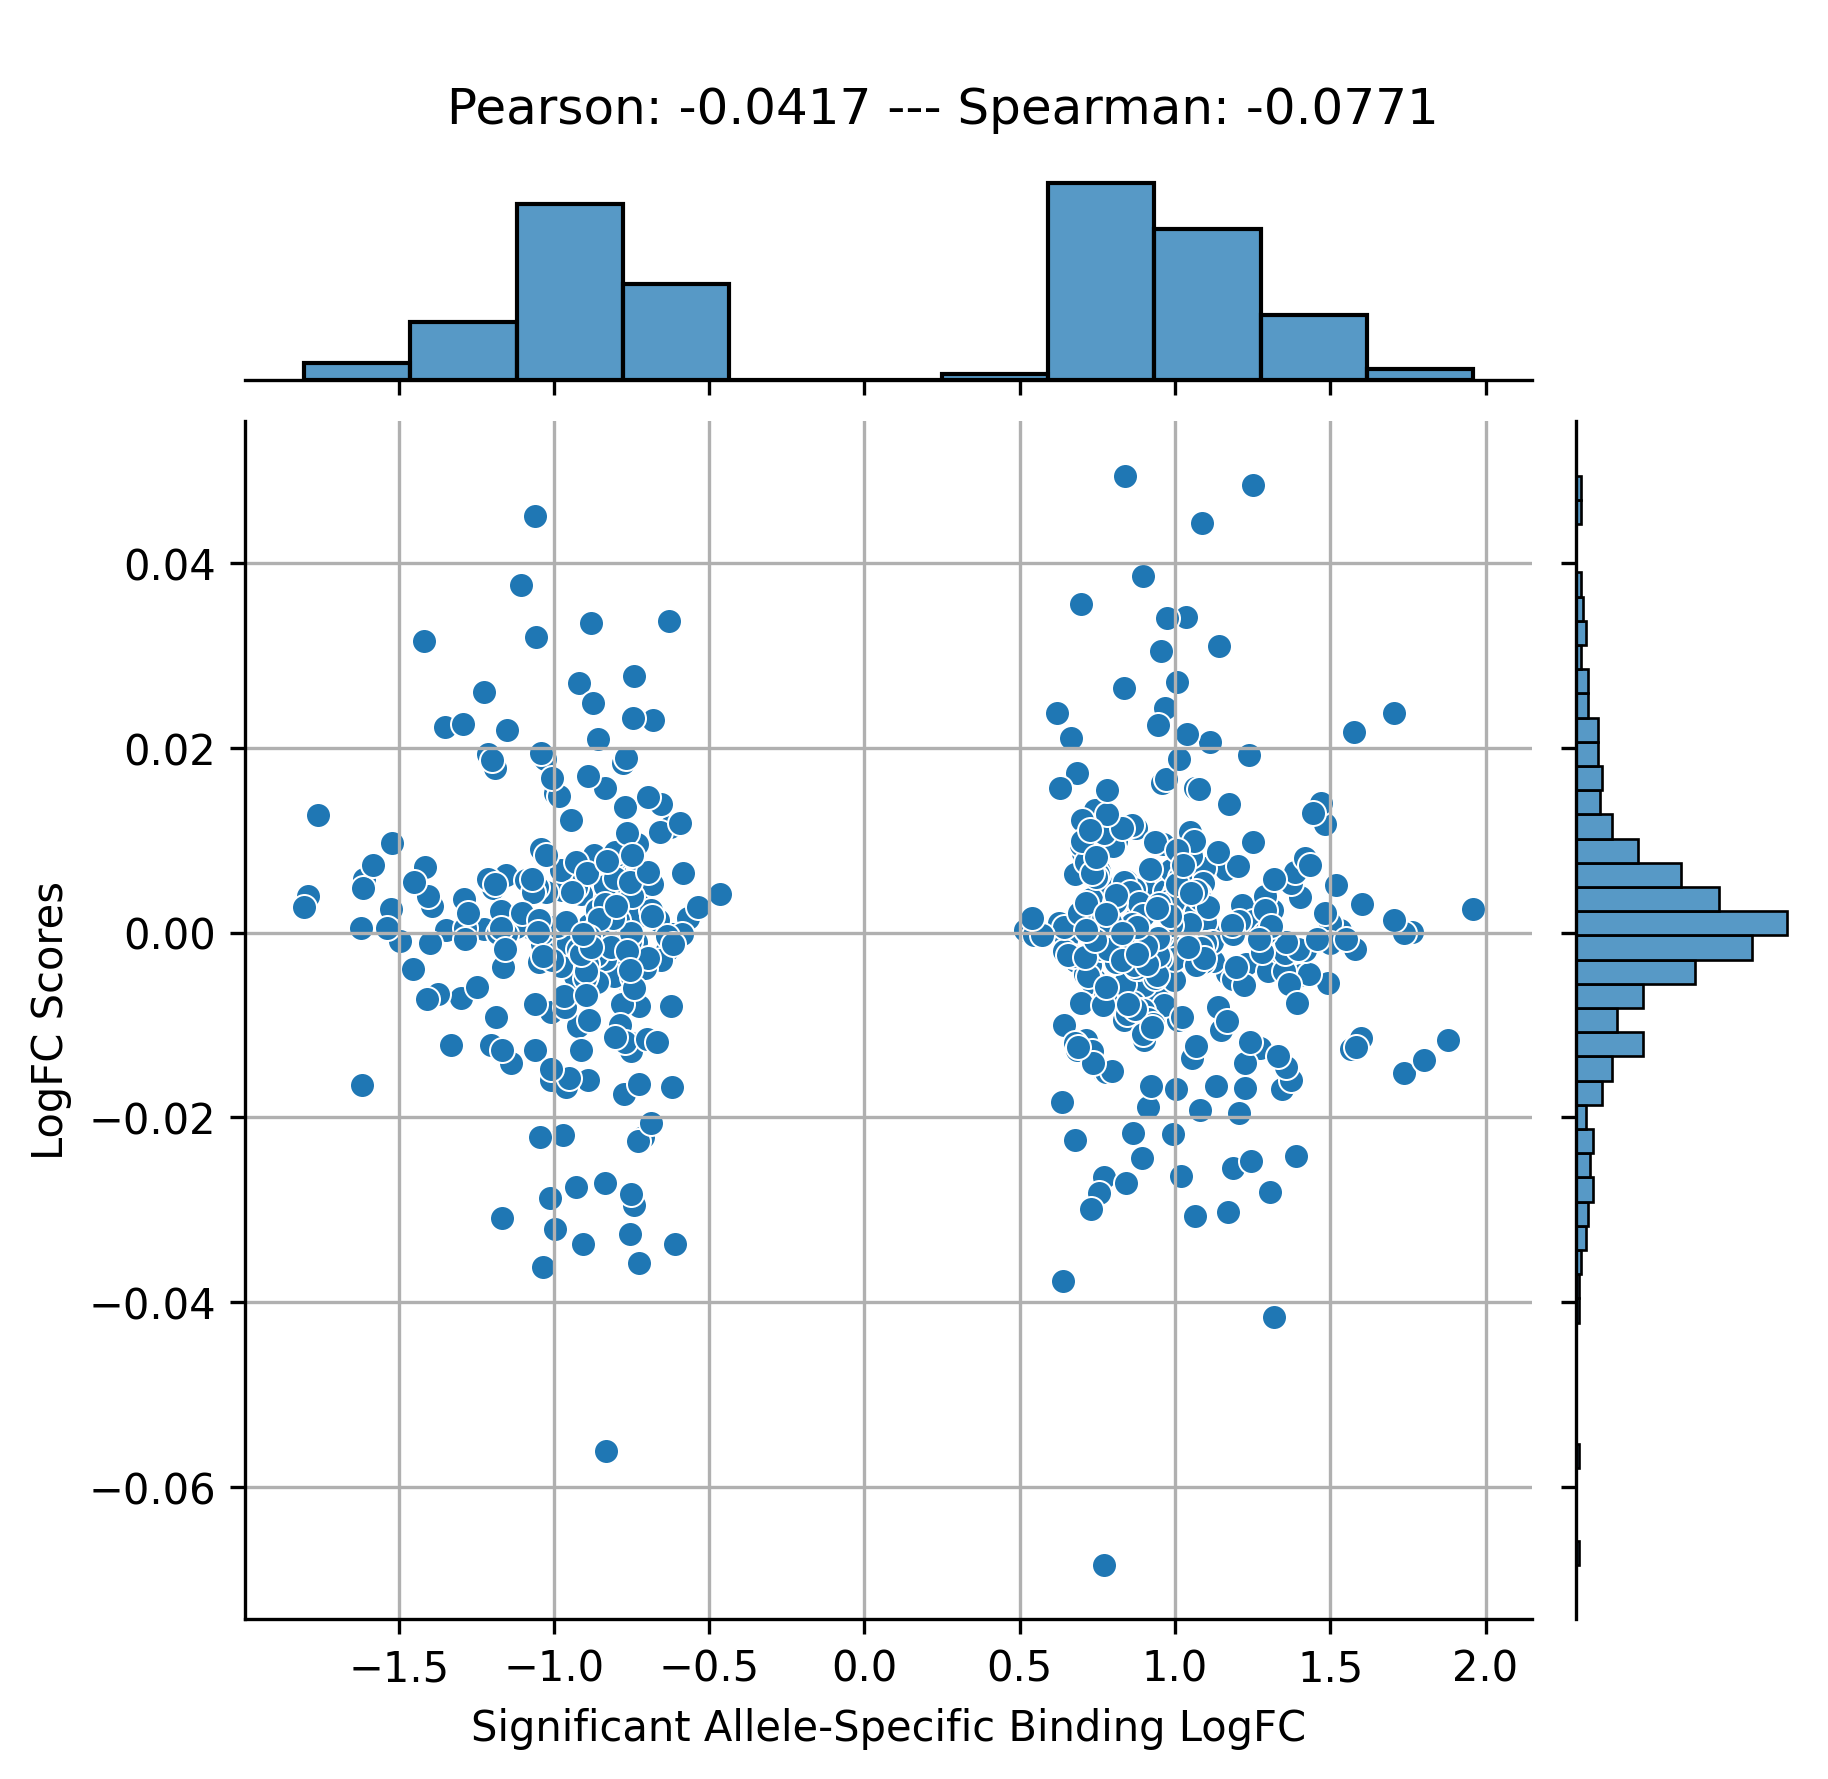

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
Nucleotide Transformer Yoruba Significant dsQTLs


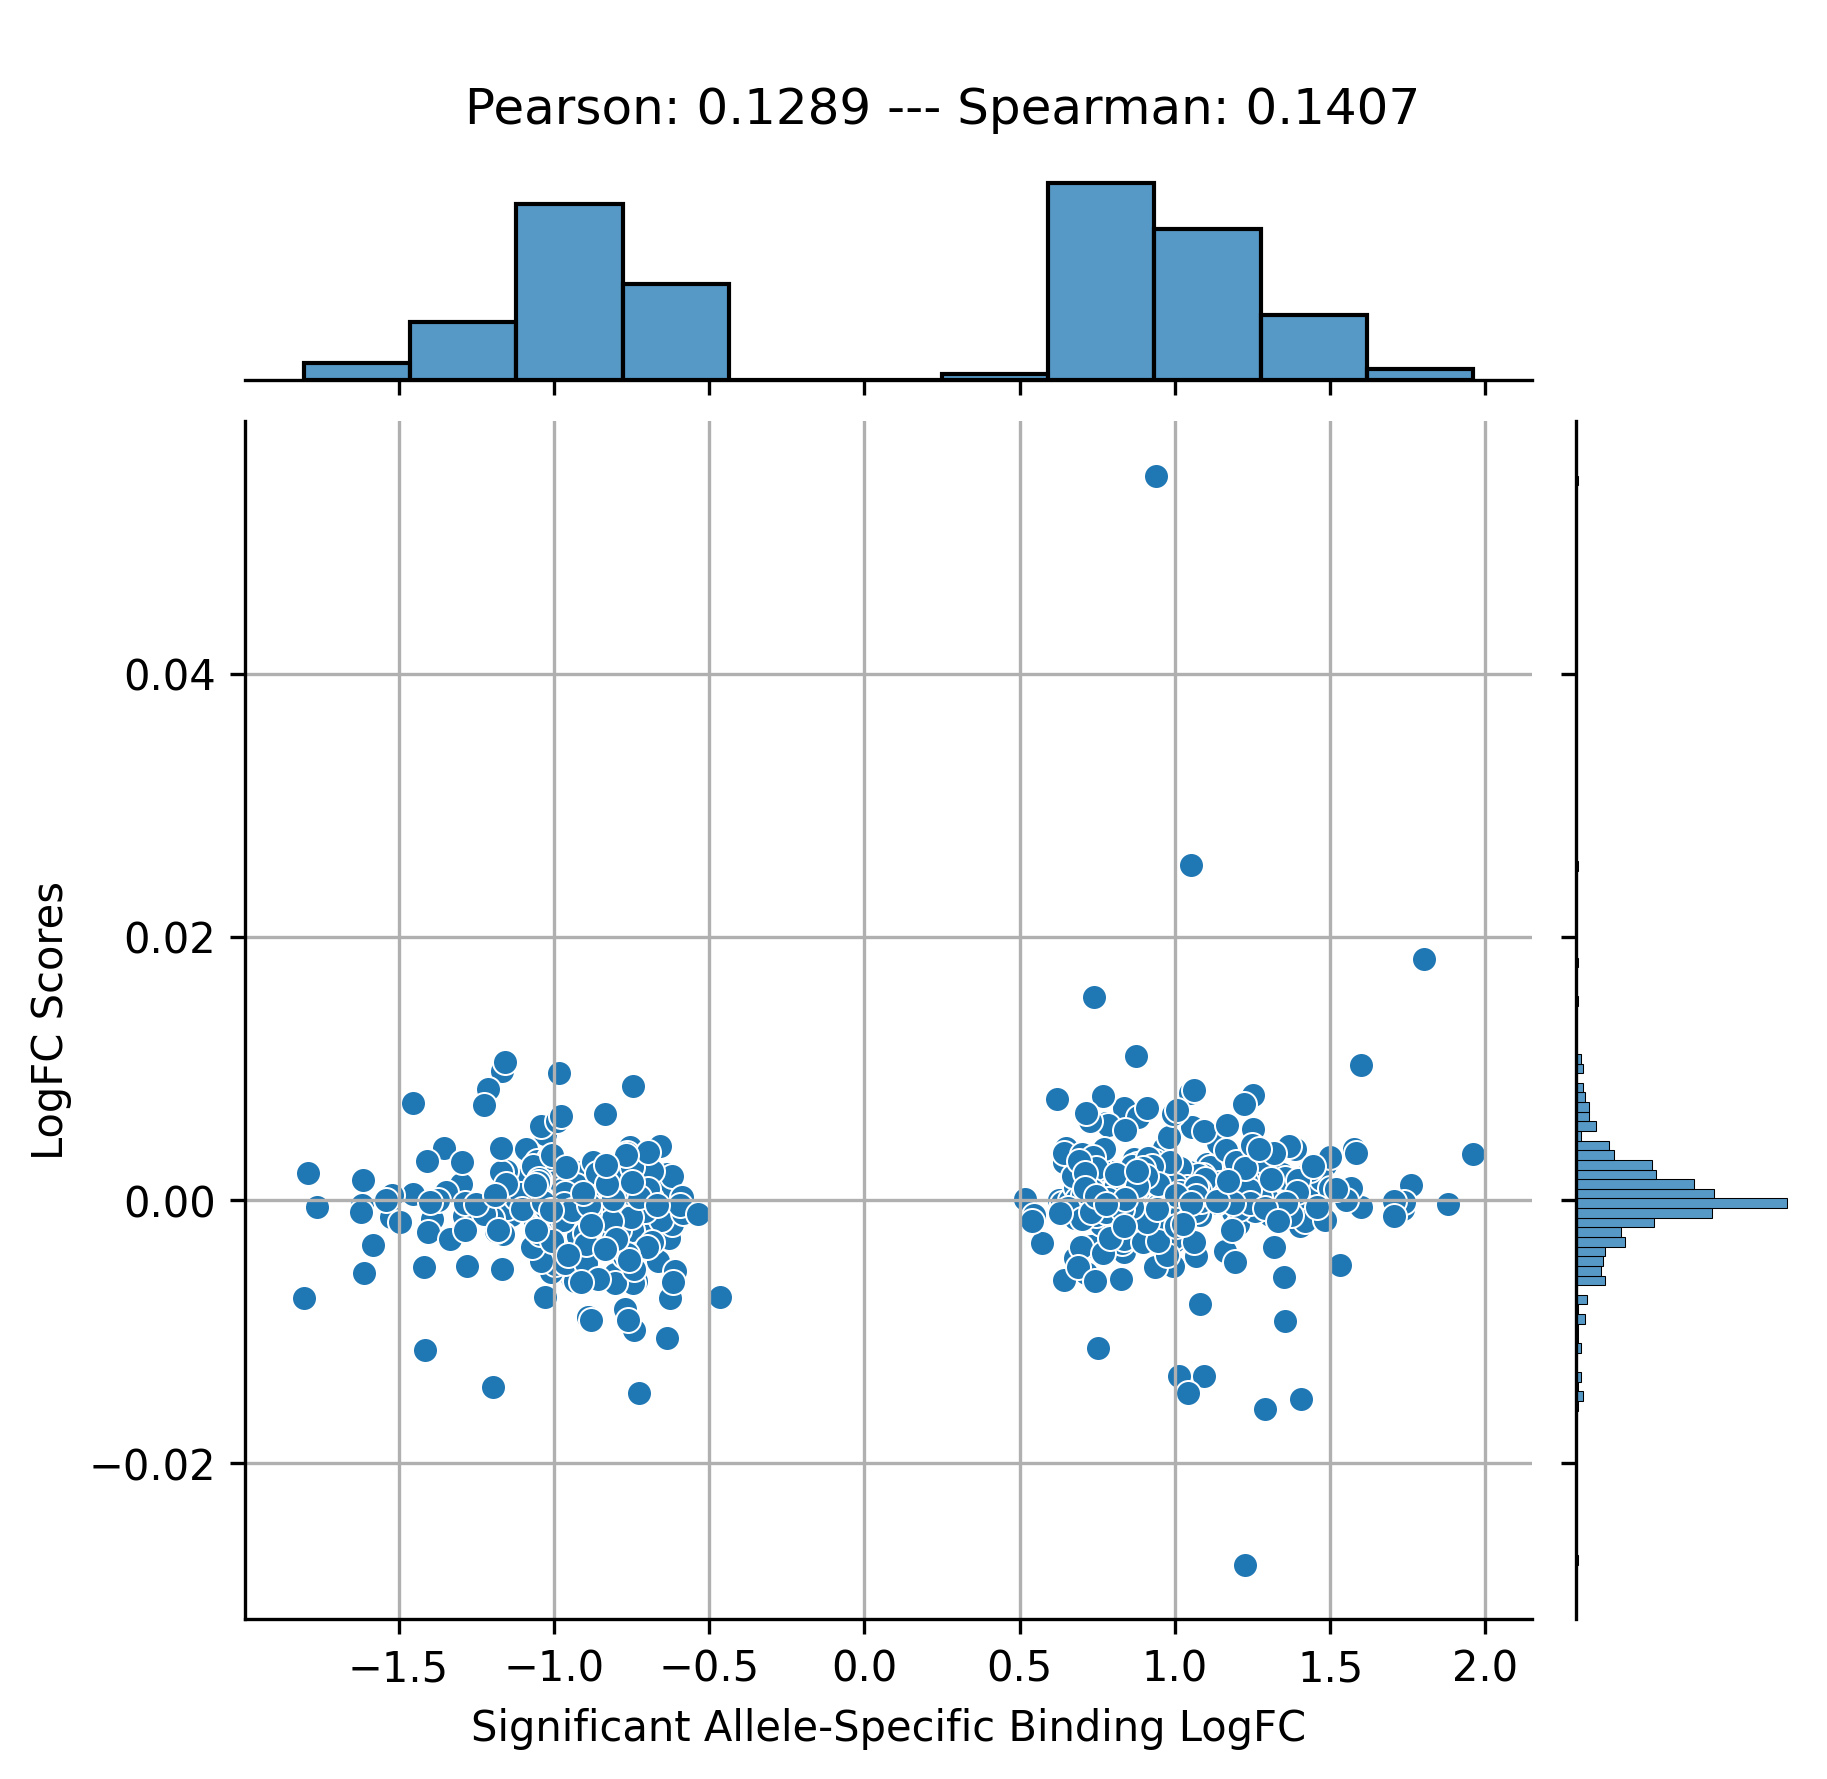

In [4]:
model_names=["DNABERT-2-117M", "gena-lm-bert-large-t2t", "hyenadna-large-1m-seqlen-hf",
             "nucleotide-transformer-v2-500m-multi-species"]
models=["DNABert2", "Gena LM", "HyenaDNA", "Nucleotide Transformer"]
model_path = os.path.join(work_dir, "task_5_variant_effect_prediction/outputs/probed")

afr_counts_pvals = []
afr_counts_auprc = []
afr_counts_auroc = []
afr_counts_pearson = []
afr_counts_spearman = []

yoruba_counts_pvals = []
yoruba_counts_auprc = []
yoruba_counts_auroc = []
yoruba_counts_pearson = []
yoruba_counts_spearman = []

for model_name, model in zip(model_names, models):
    print(f"{model_path}/{model_name}/Afr.CaQTLS.counts.tsv")
    
    filtered_var_afr_caQTLs_df_ctrl, filtered_var_afr_caQTLs_df_sig = sig_ctrl_variants_Afr_CaQTLs(f"{model_path}/{model_name}/Afr.CaQTLS.counts.tsv")
    filtered_var_afr_caQTLs_df_ctrl, ctrl_afr_counts = compute_change(filtered_var_afr_caQTLs_df_ctrl)
    filtered_var_afr_caQTLs_df_sig, sig_afr_counts = compute_change(filtered_var_afr_caQTLs_df_sig)
    afr_stat, afr_pval = mannwhitneyu(ctrl_afr_counts, sig_afr_counts, alternative="less")
    afr_counts_pvals += [afr_pval]
    print("African caQTL Mann Whitney pVal:", afr_pval)
    print(f"{model} African Significant caQTLs")
    pearson, spearman = beta_logfc(filtered_var_afr_caQTLs_df_sig, "", "log counts ratio")
    auprc, auroc = get_precision_recall_auc(ctrl_afr_counts, sig_afr_counts)
    afr_counts_auprc += [auprc]
    afr_counts_auroc += [auroc]
    afr_counts_pearson += [pearson]
    afr_counts_spearman += [spearman]

for model_name, model in zip(model_names, models):
    
    filtered_var_yoruba_caQTLs_df_ctrl, filtered_var_yoruba_caQTLs_df_sig = variants_Yoruba_LCL_dsQTLs(f"{model_path}/{model_name}/yoruban.dsqtls.counts.tsv")
    filtered_var_yoruba_caQTLs_df_ctrl, ctrl_yoruba_counts = compute_change(filtered_var_yoruba_caQTLs_df_ctrl, True)
    filtered_var_yoruba_caQTLs_df_sig, sig_yoruba_counts = compute_change(filtered_var_yoruba_caQTLs_df_sig, True)
    yoruba_stat, yoruba_pval = mannwhitneyu(ctrl_yoruba_counts, sig_yoruba_counts, alternative="less")
    yoruba_counts_pvals += [yoruba_pval]
    print(f"{model} Yoruba Significant dsQTLs")
    pearson, spearman = est_size_logfc(filtered_var_yoruba_caQTLs_df_sig, "", "log counts ratio")
    auprc, auroc = get_precision_recall_auc(ctrl_yoruba_counts, sig_yoruba_counts)
    yoruba_counts_auprc += [auprc]
    yoruba_counts_auroc += [auroc]
    yoruba_counts_pearson += [pearson]
    yoruba_counts_spearman += [spearman]

In [5]:
from tabulate import tabulate
mydata = [
    afr_counts_pearson,
    afr_counts_spearman,
    afr_counts_auroc,
    afr_counts_auprc,
    afr_counts_pvals,
    yoruba_counts_pearson,
    yoruba_counts_spearman,
    yoruba_counts_auroc,
    yoruba_counts_auprc,
    yoruba_counts_pvals,
]

index = [ "African Pearson", "African Spearman", "African AUROC", "African AUPRC", "African P value", 
          "Yoruba Pearson", "Yoruba Spearman", "Yoruba AUROC","Yoruba AUPRC", "Yoruba P value"]

mydata = [[i] + row for i, row in zip(index, mydata)]

print(tabulate(mydata, headers=models, tablefmt="grid"))

+------------------+-------------+--------------+--------------+--------------------------+
|                  |    DNABert2 |      Gena LM |     HyenaDNA |   Nucleotide Transformer |
+==================+=============+==============+==============+==========================+
| African Pearson  |  0.006416   | -0.0067167   |  0.0121254   |              0.00578088  |
+------------------+-------------+--------------+--------------+--------------------------+
| African Spearman |  0.0110799  |  0.00819224  |  0.0138697   |              0.00515102  |
+------------------+-------------+--------------+--------------+--------------------------+
| African AUROC    |  0.502418   |  0.514857    |  0.565787    |              0.524769    |
+------------------+-------------+--------------+--------------+--------------------------+
| African AUPRC    |  0.0809514  |  0.0835737   |  0.0936533   |              0.086985    |
+------------------+-------------+--------------+--------------+----------------